# **Boston House Price**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.datasets import fetch_openml

In [2]:
boston=fetch_openml(name='Boston',version=1,as_frame=True)

In [3]:
print(boston.feature_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [4]:
print(boston.DESCR) #Information of Dataset

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [5]:
print(boston.data)

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

## Preparing the Dataset

In [6]:
df = pd.DataFrame(boston.data)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [7]:
df['price'] = boston.target

In [8]:
# Summarizing the Stats if the data
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# Handling Missing Value
df.isnull().sum().head()

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
dtype: int64

## EDA (Exploratory Data Analysis)

In [10]:
# Correlation
df.corr()
#By default Pearson correlationid use Value Range:
# The value of the coefficient r always falls between -1 and +1.
# r = +1: Represents a perfect positive linear relationship. As one variable increases, the other increases proportionally.
# r = -1: Represents a perfect negative linear relationship. As one variable increases, the other decreases proportionally.
# r = 0: Represents no linear relationship. The two variables do not change in a consistent linear pattern.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


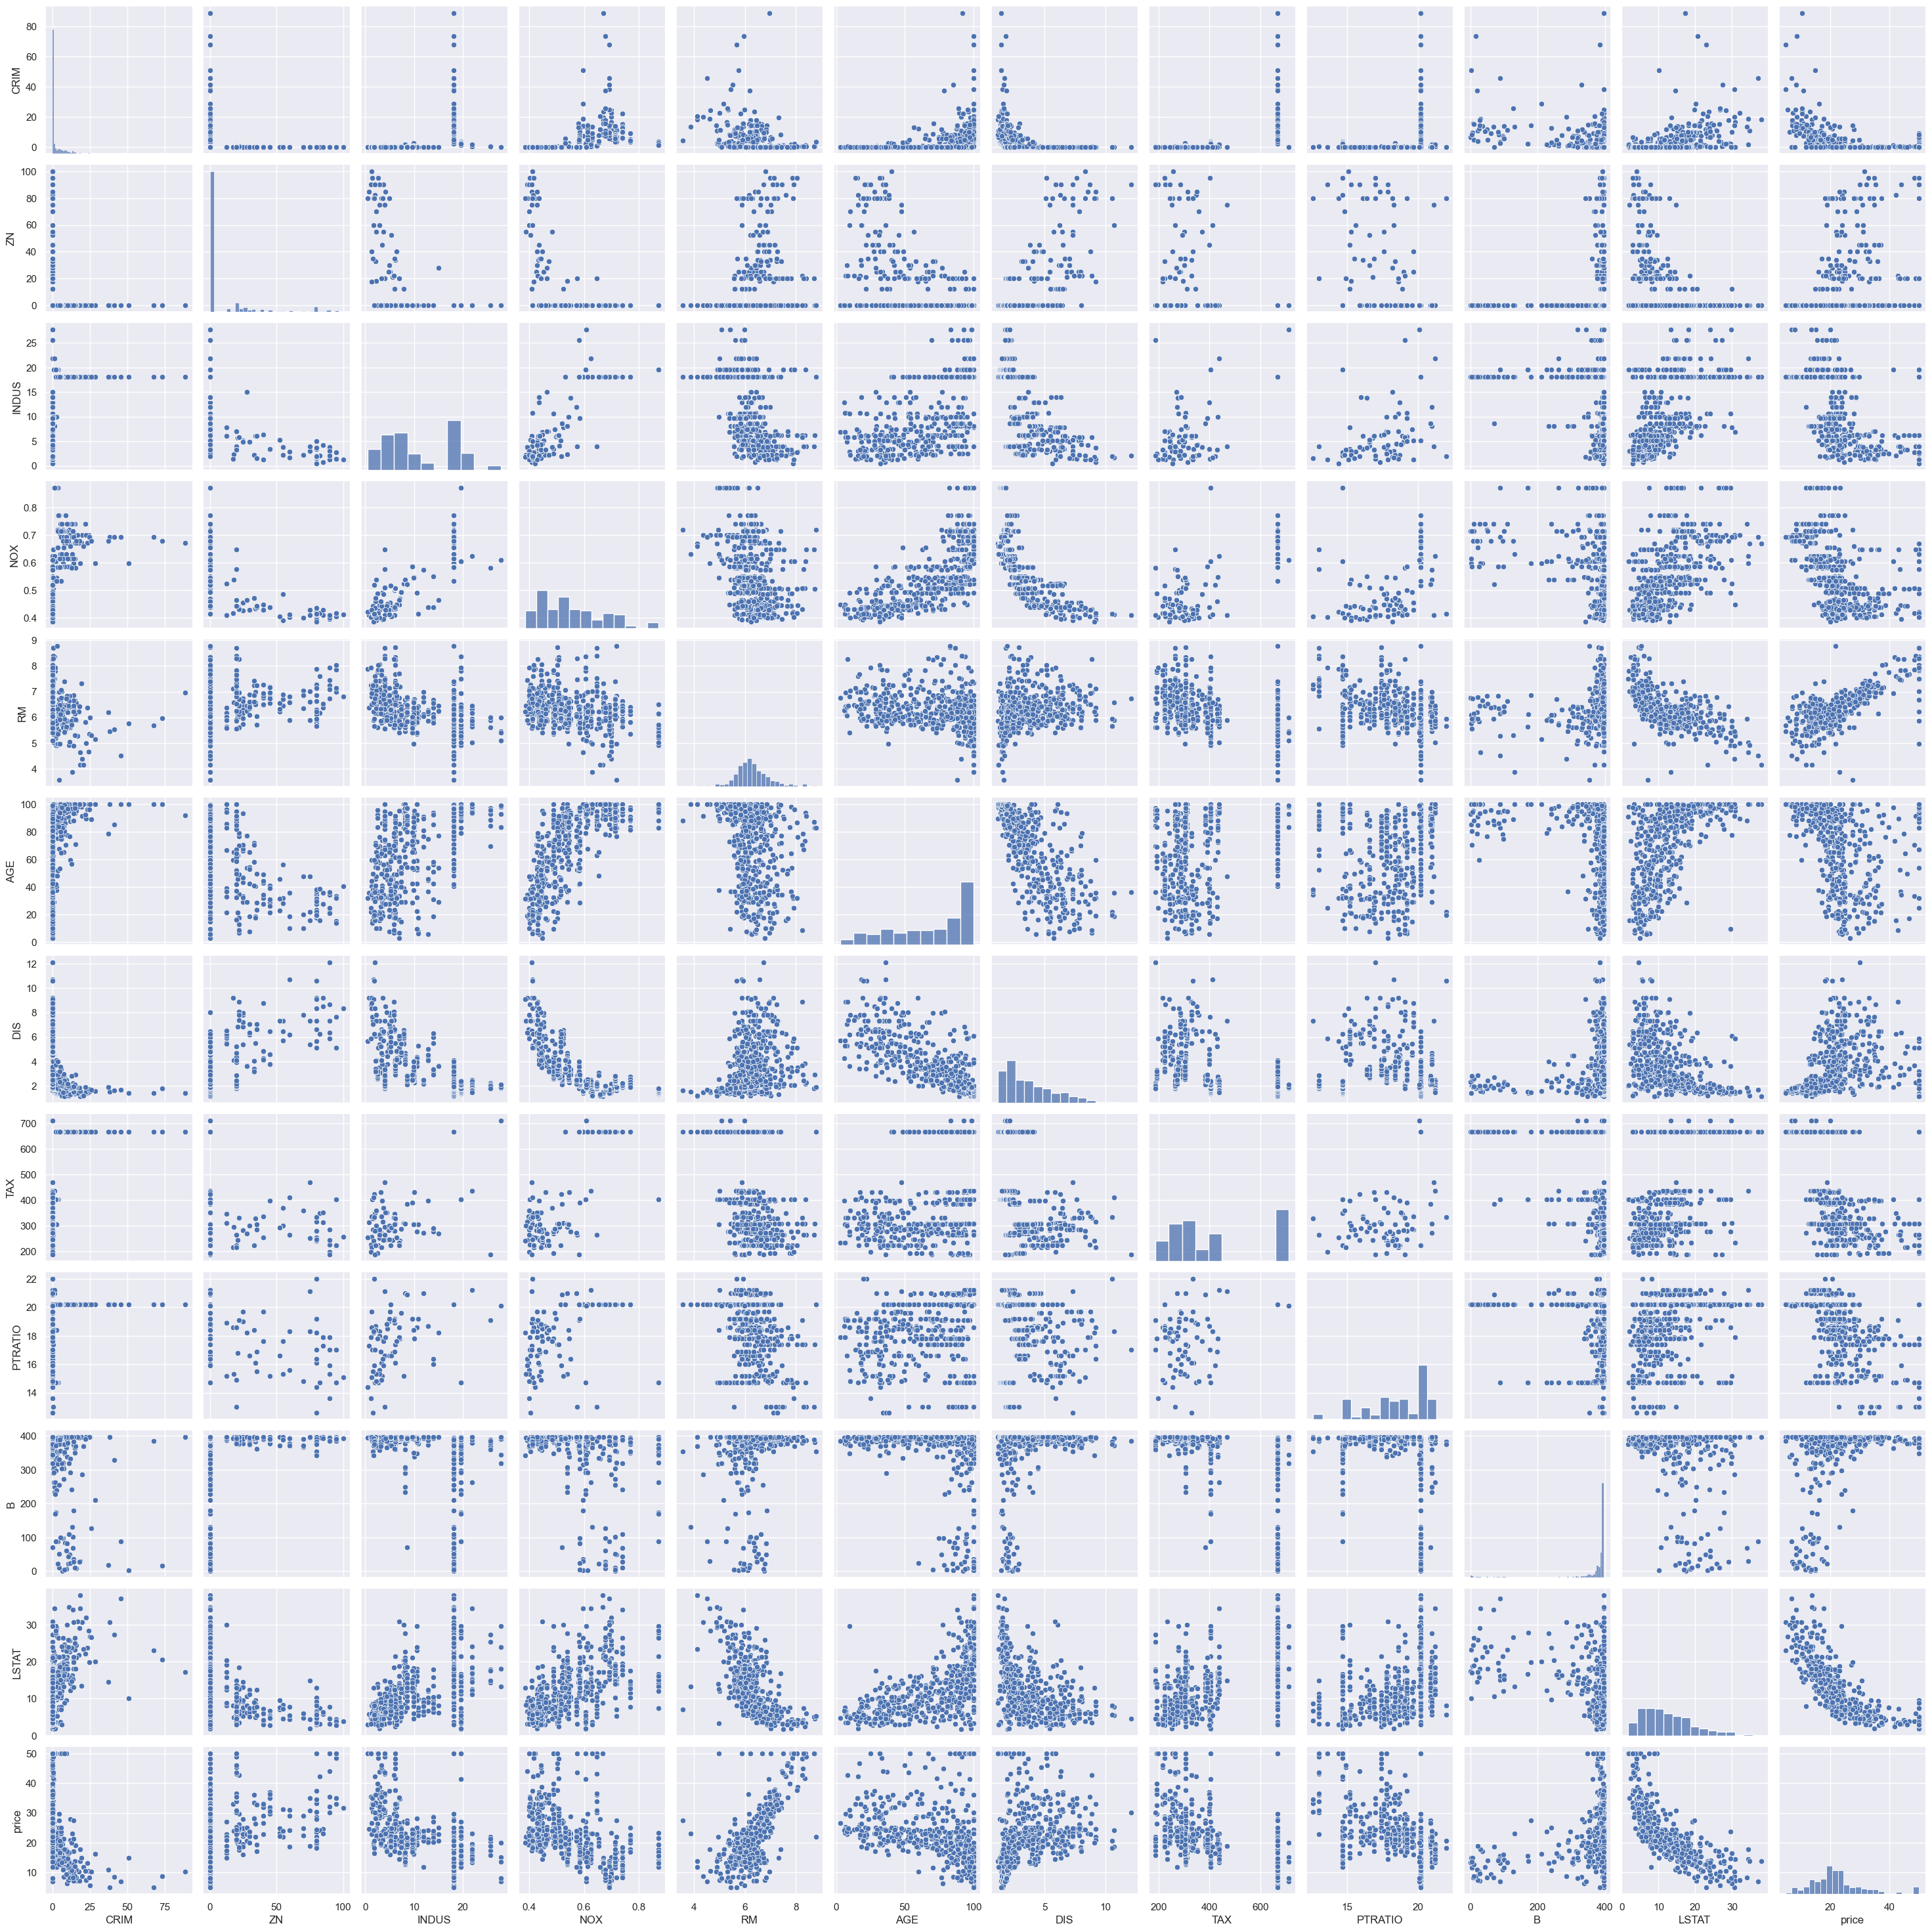

In [11]:
sns.set(rc={'figure.figsize': (12, 6)})
sns.pairplot(df)  # Shows the correlation with others in the form of graph

Text(0, 0.5, 'Price')

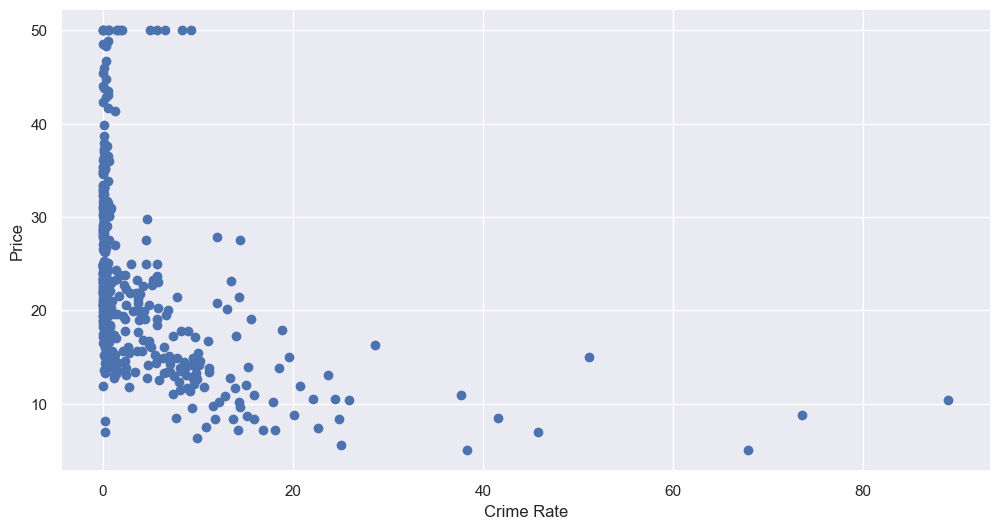

In [12]:
plt.scatter(df['CRIM'], df['price'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')

<Axes: xlabel='RM', ylabel='price'>

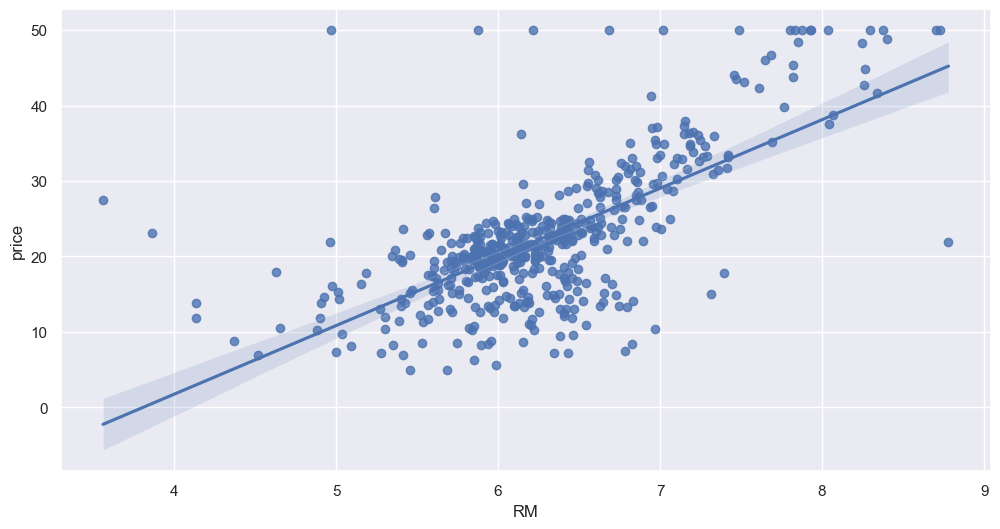

In [13]:
sns.regplot(x='RM', y='price', data=df)

<Axes: xlabel='LSTAT', ylabel='price'>

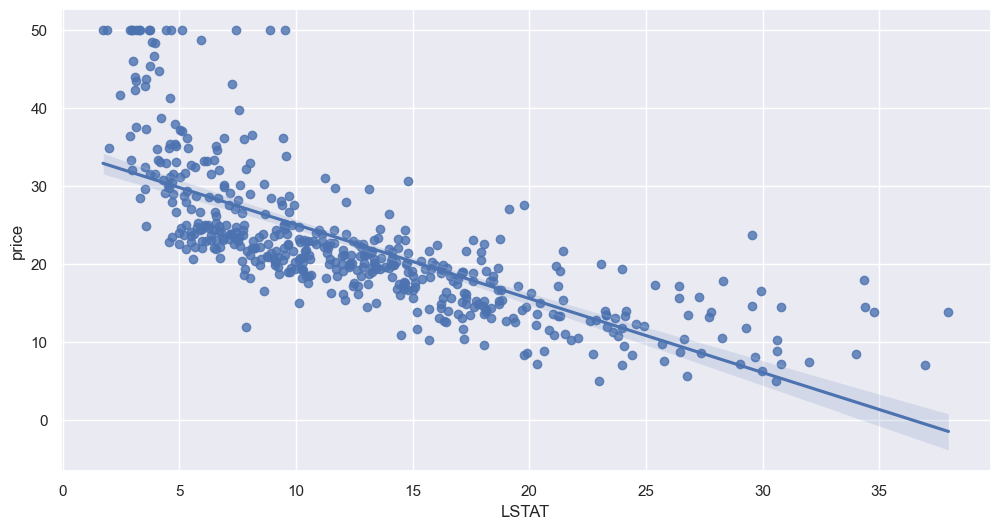

In [14]:
sns.regplot(x='LSTAT', y='price', data=df)

<Axes: xlabel='CHAS', ylabel='price'>

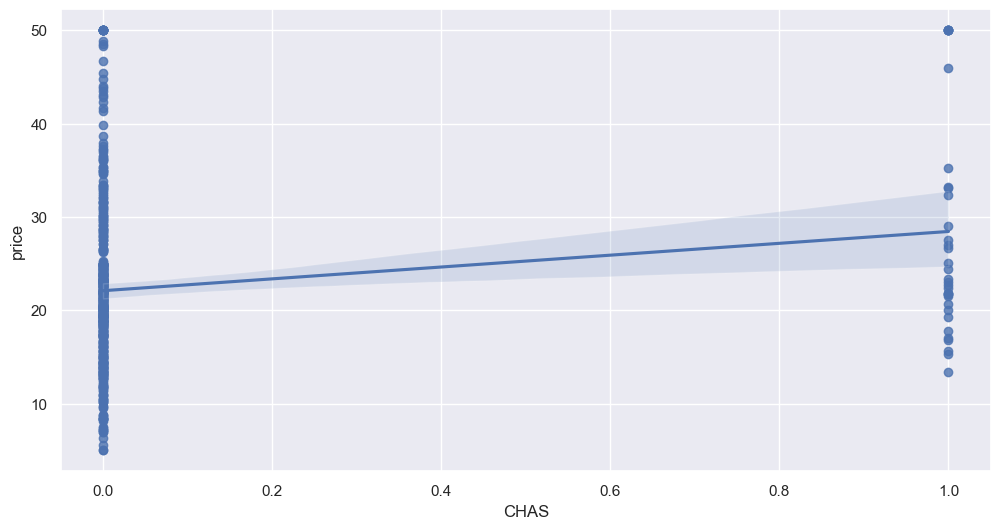

In [15]:
sns.regplot(x=df['CHAS'].astype(int), y=df['price'])

<Axes: xlabel='PTRATIO', ylabel='price'>

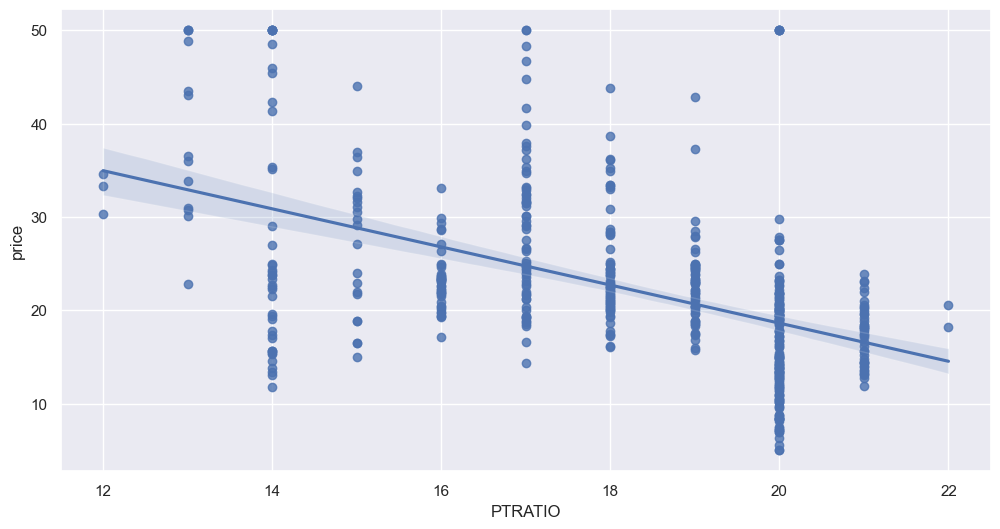

In [16]:
sns.regplot(x=df['PTRATIO'].astype(int), y=df['price'])

In [17]:
# Independent Variable (Features) (X) and Dependent Variable (Price) (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [18]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
# Standardize the Dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() # We transform the data to one scale to mininum the loss function and if different scale computer priotize the big values more
#Standardization (or Z-score normalization) transforms the data to have a mean of 0 and a standard deviation of 1.
X_train=scaler.fit_transform(X_train) # fit_transform calculate and transforms the data
X_test=scaler.transform(X_test) # transform previous calculation tranform the data

In [20]:
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

## Model Traning

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
# Print cofficients and intercept 
print(lr.coef_) # weight of each features

[-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]


In [23]:
print(lr.intercept_)

22.796534653465343


In [24]:
#to check the paramter under which the model is trained
print(lr.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}


In [25]:
y_pred = lr.predict(X_test)
y_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [26]:
matplotlib.rcParams['figure.figsize'] = (12,6)  # give the default size to all plot

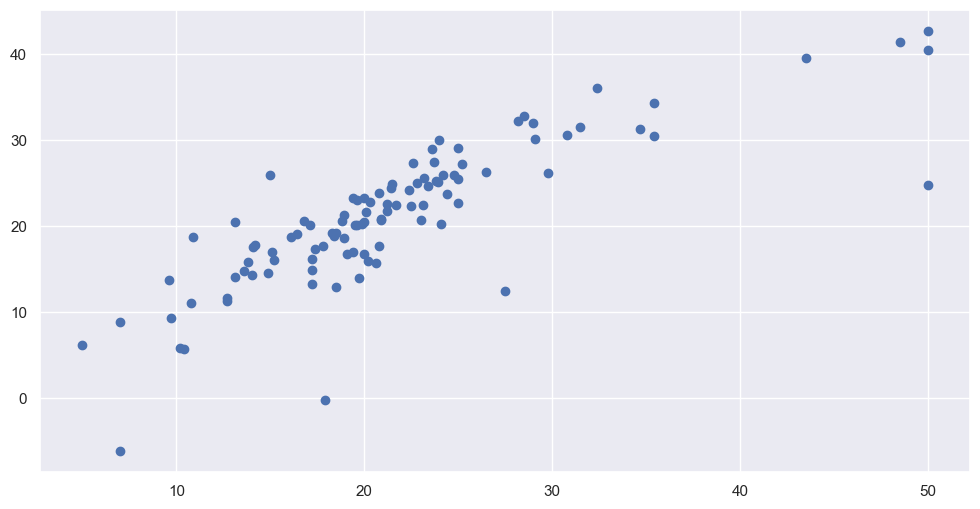

In [27]:
#plt a scatter plot
plt.scatter( y_test, y_pred)

<Axes: xlabel='price'>

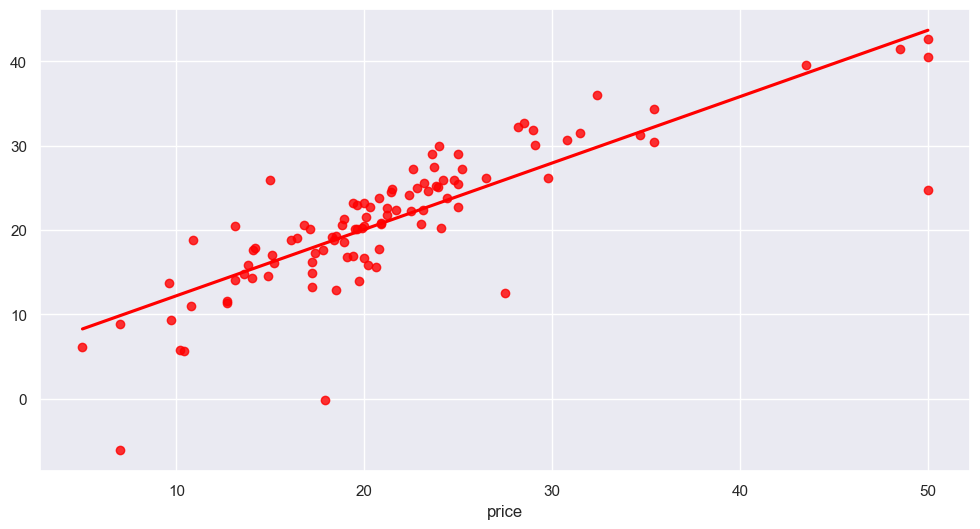

In [28]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [29]:
residuals = y_test - y_pred
residuals

173    -5.396724
274    -3.625565
491    -1.216944
72     -2.231979
452    -2.669880
         ...    
412    18.064237
436    -4.084867
411     1.016403
86      0.223780
75     -3.079024
Name: price, Length: 102, dtype: float64

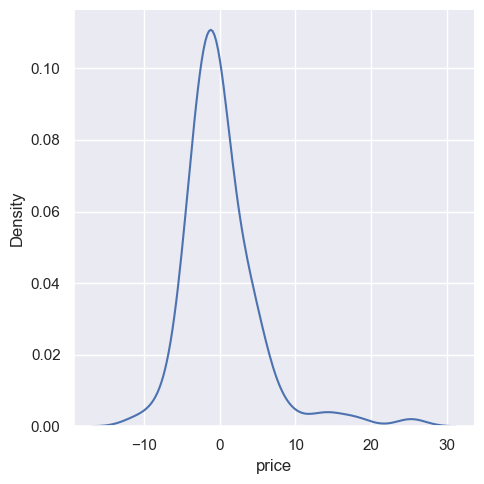

In [30]:
# Plot these residulas
sns.displot(residuals,kind='kde') #right skwed ,means outliers are presnt

In [31]:
# Performace Metrics (MSE, RSME, MAE)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(root_mean_squared_error(y_test, y_pred))

3.1890919658878483
24.291119474973517
4.928602182665336


In [32]:
#R^2 = 1 - SSR/SST
# R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.668759493535632


In [33]:
# Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6198262368988503

## New Data Prediction

In [34]:
boston.data.iloc[0].to_numpy().reshape(1, -1)

array([[np.float64(0.00632), np.float64(18.0), np.float64(2.31), '0',
        np.float64(0.538), np.float64(6.575), np.float64(65.2),
        np.float64(4.09), '1', np.float64(296.0), np.float64(15.3),
        np.float64(396.9), np.float64(4.98)]], dtype=object)

In [35]:
# Transfromation of new data
scaler.transform(boston.data.iloc[0].to_numpy().reshape(1, -1))

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.4064505 ,  0.27809835, -1.25979517, -0.27808871, -0.15723342,
         0.365677  , -0.1200431 ,  0.13239061, -0.97404758, -0.65092617,
        -1.35597347,  0.44418004, -1.05291444]])

In [36]:
lr.predict(scaler.transform(boston.data.iloc[0].to_numpy().reshape(1, -1)))

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.95339638])

## Pickling The Model file for deployement 

In [37]:
import pickle
pickle.dump(lr,open('regmodel.pkl', 'wb'))
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [42]:
pickled_model.predict(scaler.transform(boston.data.iloc[0].to_numpy().reshape(1, -1)))

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.95339638])

(1,)
